In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.3
1.3.4
0.11.2


## Dataset 2-  Education - Post 12th Standard.csv 

In [3]:
colleges= pd.read_csv('Education+-+Post+12th+Standard.csv')

In [4]:
colleges.shape

(777, 18)

In [5]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
colleges.head(10)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   
5             Albertson College   587     479     158         38         62   
6       Albertus Magnus College   353     340     103         17         45   
7                Albion College  1899    1720     489         37         68   
8              Albright College  1038     839     227         30         63   
9     Alderson-Broaddus College   582     498     172         21         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   
5          678           41     13500        3335    500       675   67   
6          416          230     13290        5720    500      1500   90   
7         1594           32     13868        4826    450       850   89   
8          973          306     15595        4400    300       500   79   
9          799           78     10468        3380    660      1800   40   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15  
5        73        9.4           11    9727         55  
6        93       11.5           26    8861         63  
7       100       13.7           37   11487         73  
8        84       11.3           23   11644         80  
9        41       11.5           15    8991         52

In [7]:
colleges.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

Univariate Analysis for the 17 variables:

Apps:

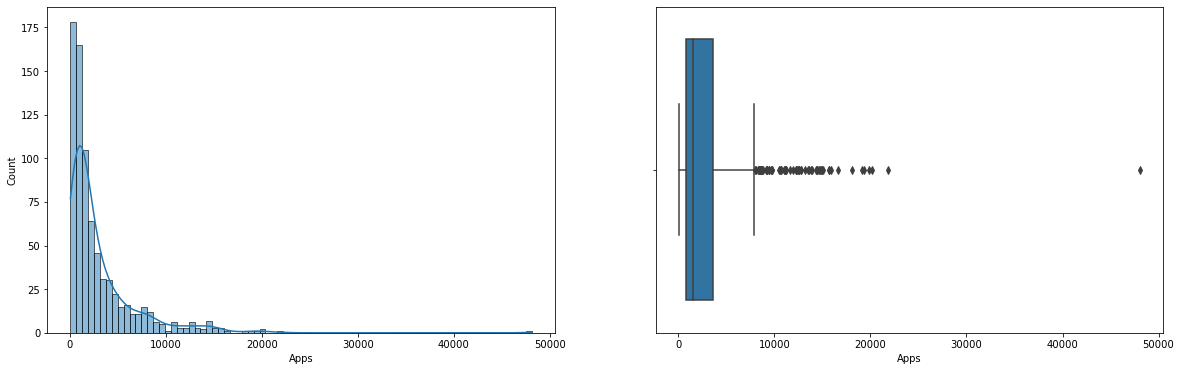

In [8]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Apps, kde=True, ax=axs[0])
sns.boxplot(x='Apps',data=colleges, ax=axs[1]);

Accept:

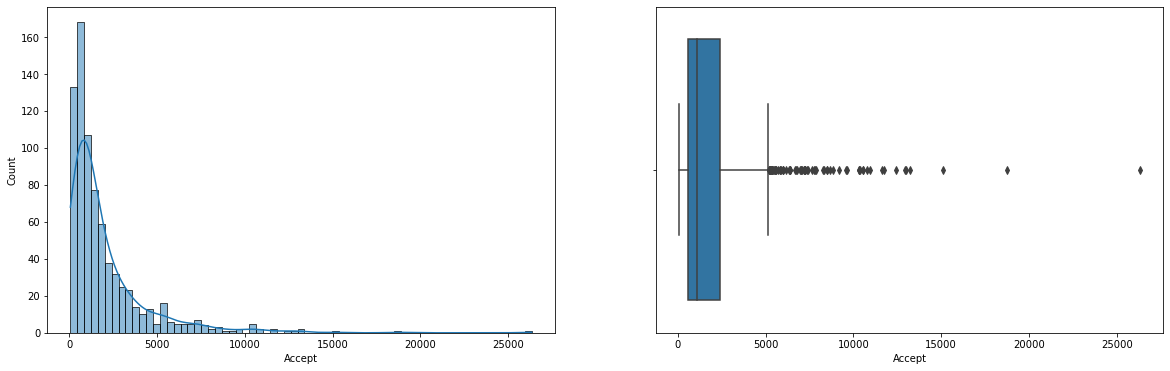

In [9]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Accept, kde=True, ax=axs[0])
sns.boxplot(x='Accept',data=colleges, ax=axs[1]);

Enroll

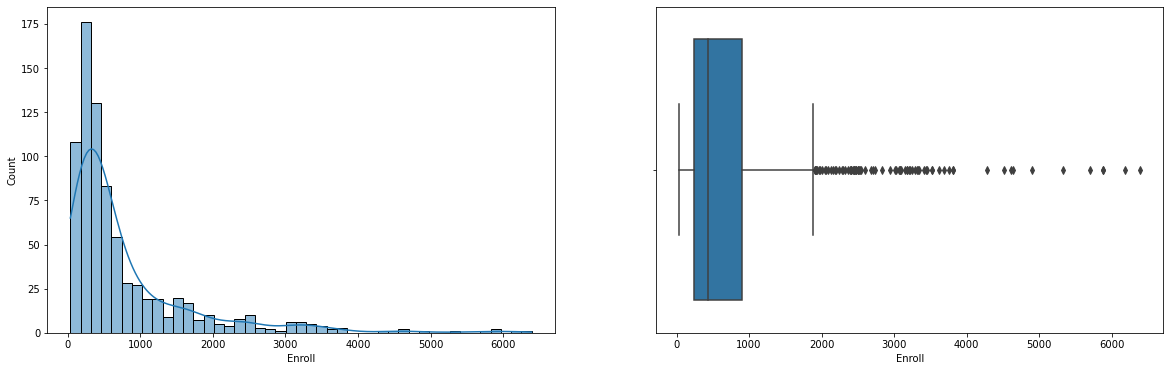

In [10]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Enroll, kde=True, ax=axs[0])
sns.boxplot(x='Enroll',data=colleges, ax=axs[1]);

Top10perc	

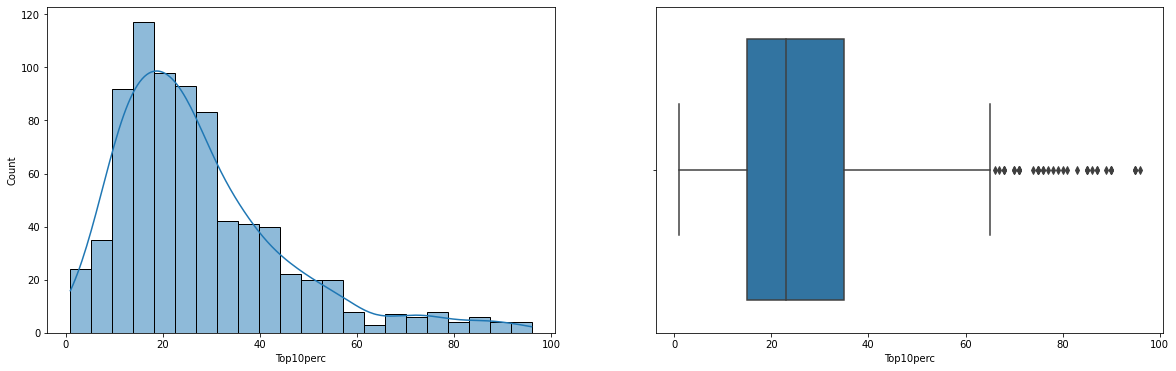

In [11]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Top10perc, kde=True, ax=axs[0])
sns.boxplot(x='Top10perc',data=colleges, ax=axs[1]);

Top25perc	

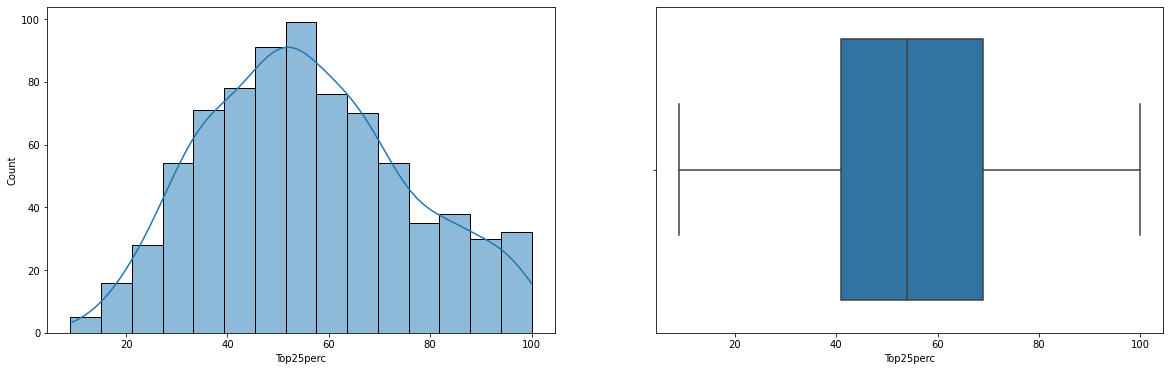

In [12]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Top25perc, kde=True, ax=axs[0])
sns.boxplot(x='Top25perc',data=colleges, ax=axs[1]);

F.Undergrad

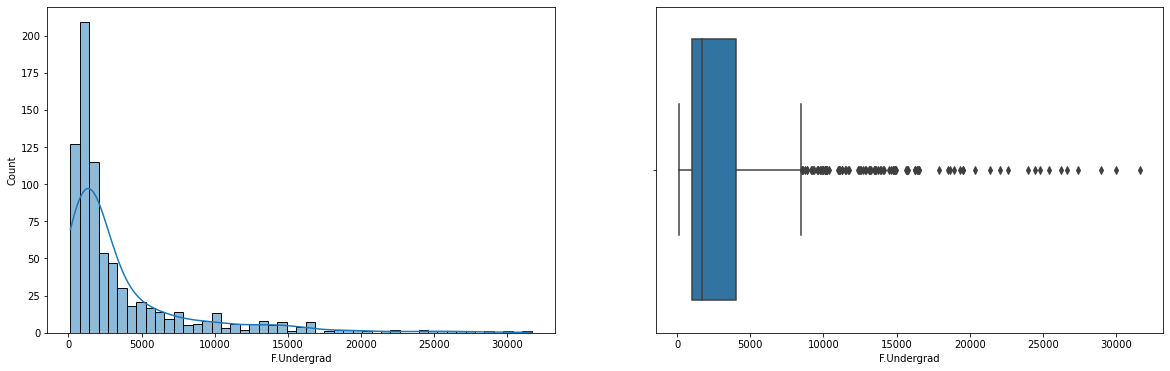

In [13]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['F.Undergrad'], kde=True, ax=axs[0])
sns.boxplot(x='F.Undergrad',data=colleges, ax=axs[1]);

P.Undergrad	

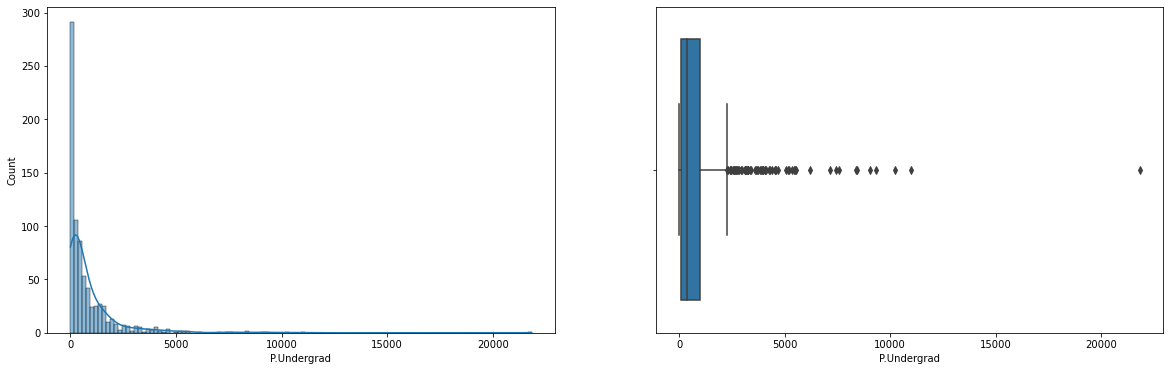

In [14]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['P.Undergrad'], kde=True, ax=axs[0])
sns.boxplot(x='P.Undergrad',data=colleges, ax=axs[1]);

Outstate	

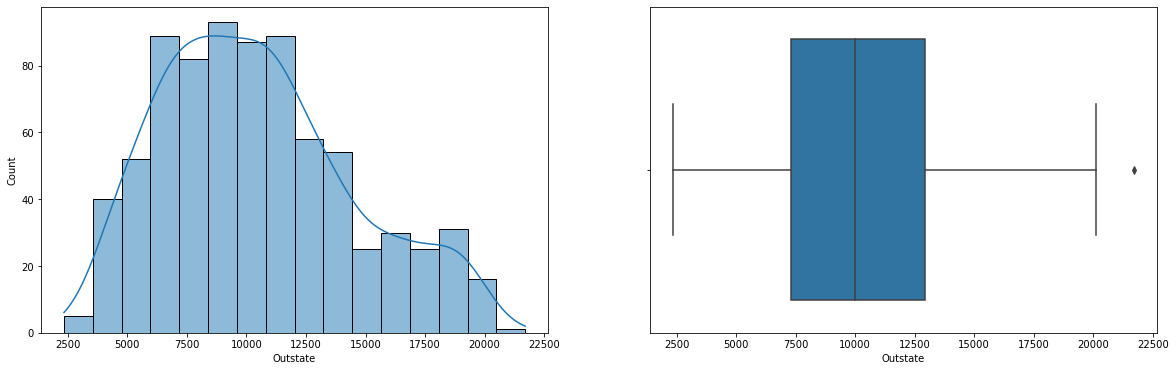

In [15]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Outstate, kde=True, ax=axs[0])
sns.boxplot(x='Outstate',data=colleges, ax=axs[1]);

Room.Board	

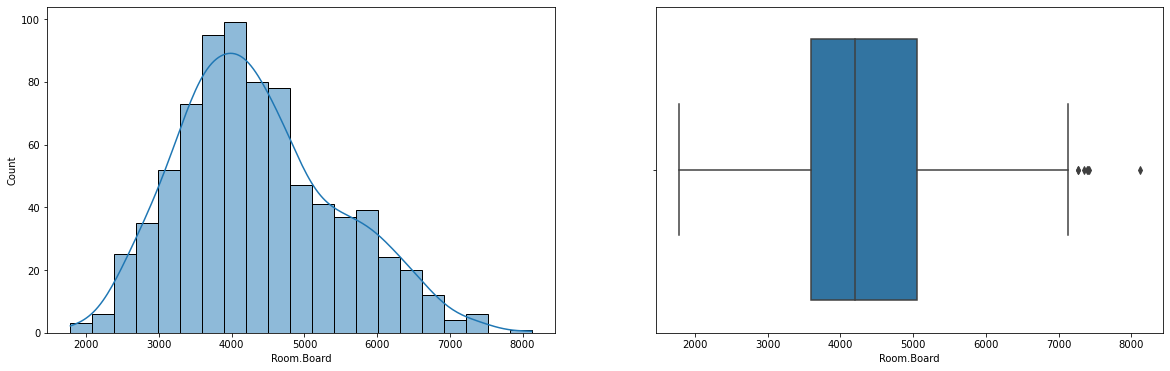

In [16]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['Room.Board'], kde=True, ax=axs[0])
sns.boxplot(x='Room.Board',data=colleges, ax=axs[1]);

Books	

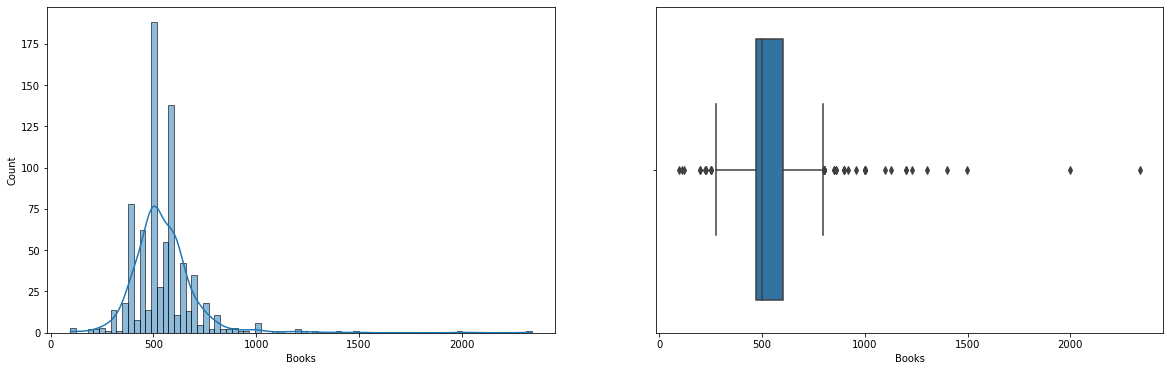

In [17]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Books, kde=True, ax=axs[0])
sns.boxplot(x='Books',data=colleges, ax=axs[1]);

Personal	

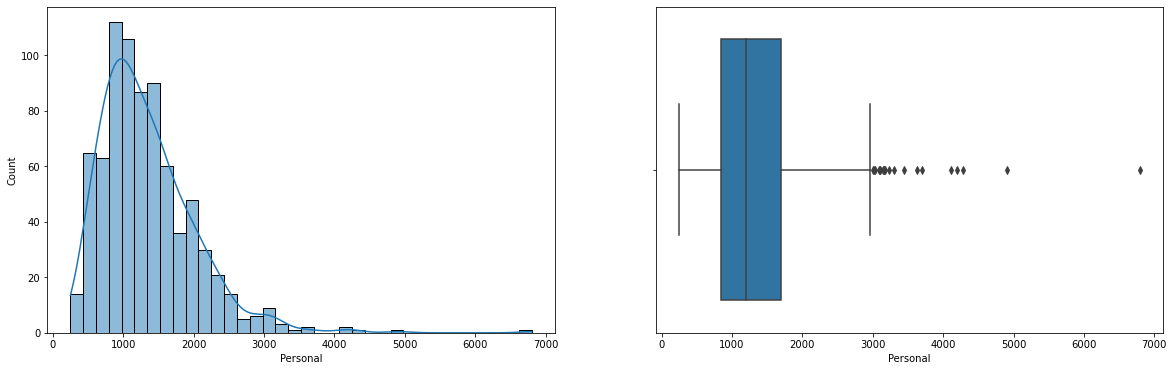

In [18]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Personal, kde=True, ax=axs[0])
sns.boxplot(x='Personal',data=colleges, ax=axs[1]);

PhD	

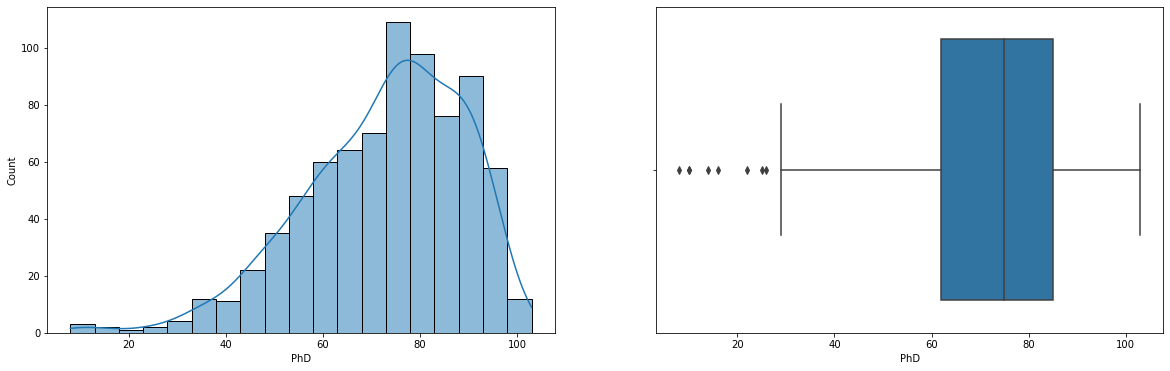

In [19]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.PhD, kde=True, ax=axs[0])
sns.boxplot(x='PhD',data=colleges, ax=axs[1]);

Terminal	

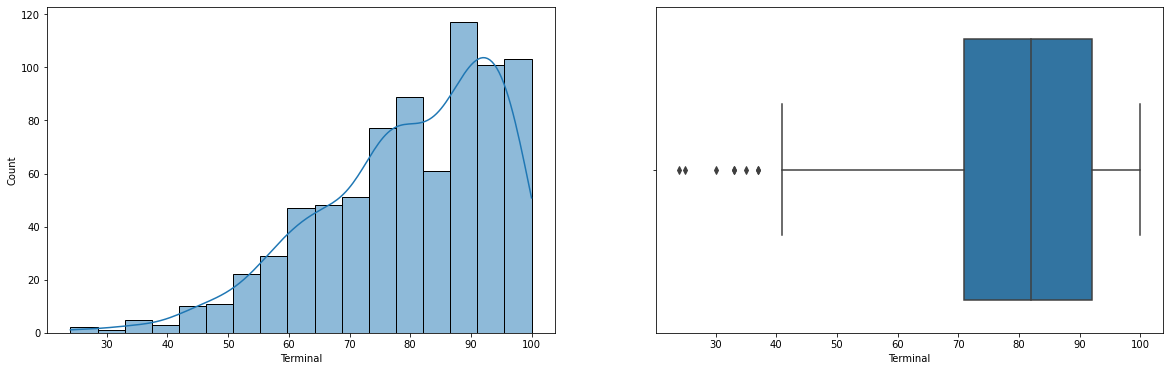

In [20]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Terminal, kde=True, ax=axs[0])
sns.boxplot(x='Terminal',data=colleges, ax=axs[1]);

S.F.Ratio	

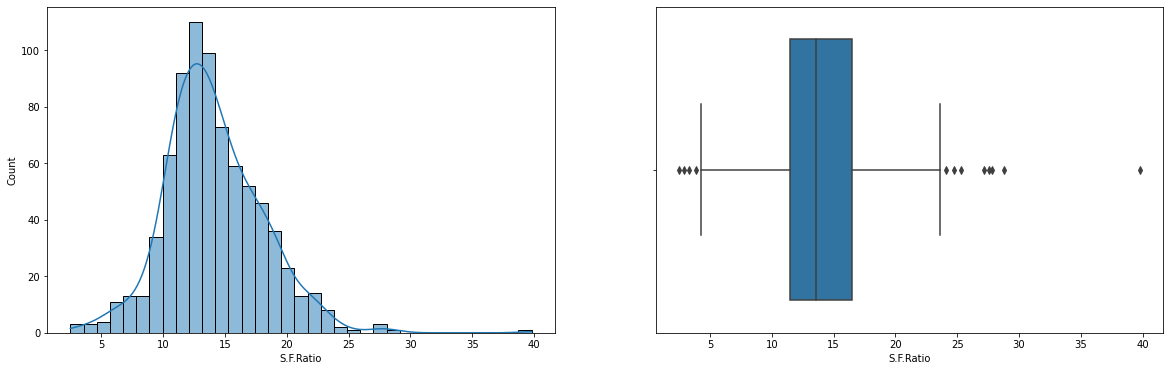

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['S.F.Ratio'], kde=True, ax=axs[0])
sns.boxplot(x='S.F.Ratio' ,data=colleges, ax=axs[1]);

perc.alumni	

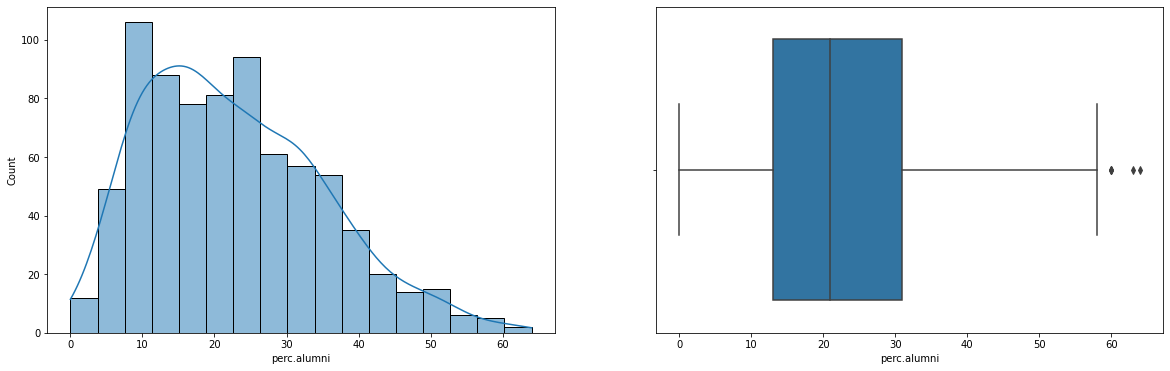

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['perc.alumni'], kde=True, ax=axs[0])
sns.boxplot(x='perc.alumni' ,data=colleges, ax=axs[1]);

Expend	

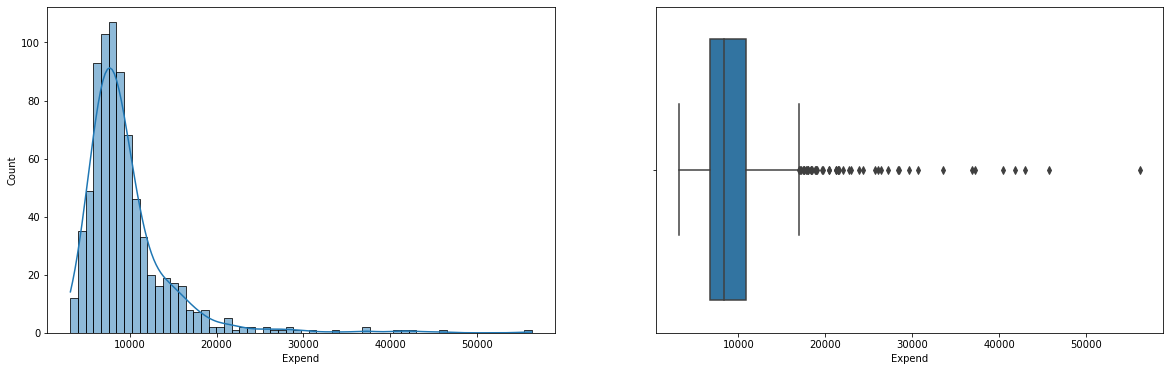

In [23]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges.Expend, kde=True, ax=axs[0])
sns.boxplot(x='Expend',data=colleges, ax=axs[1]);

Grad.Rate

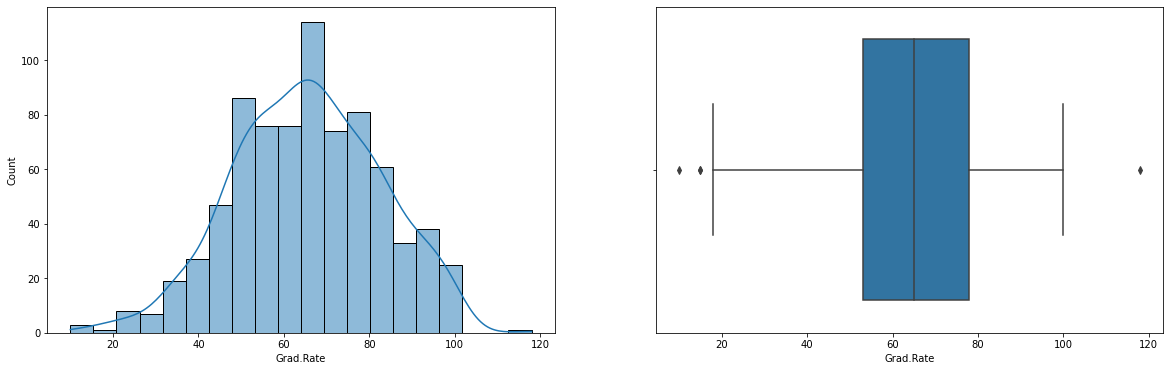

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(colleges['Grad.Rate'], kde=True, ax=axs[0])
sns.boxplot(x='Grad.Rate' ,data=colleges, ax=axs[1]);

Multi-variate Analysis for variables

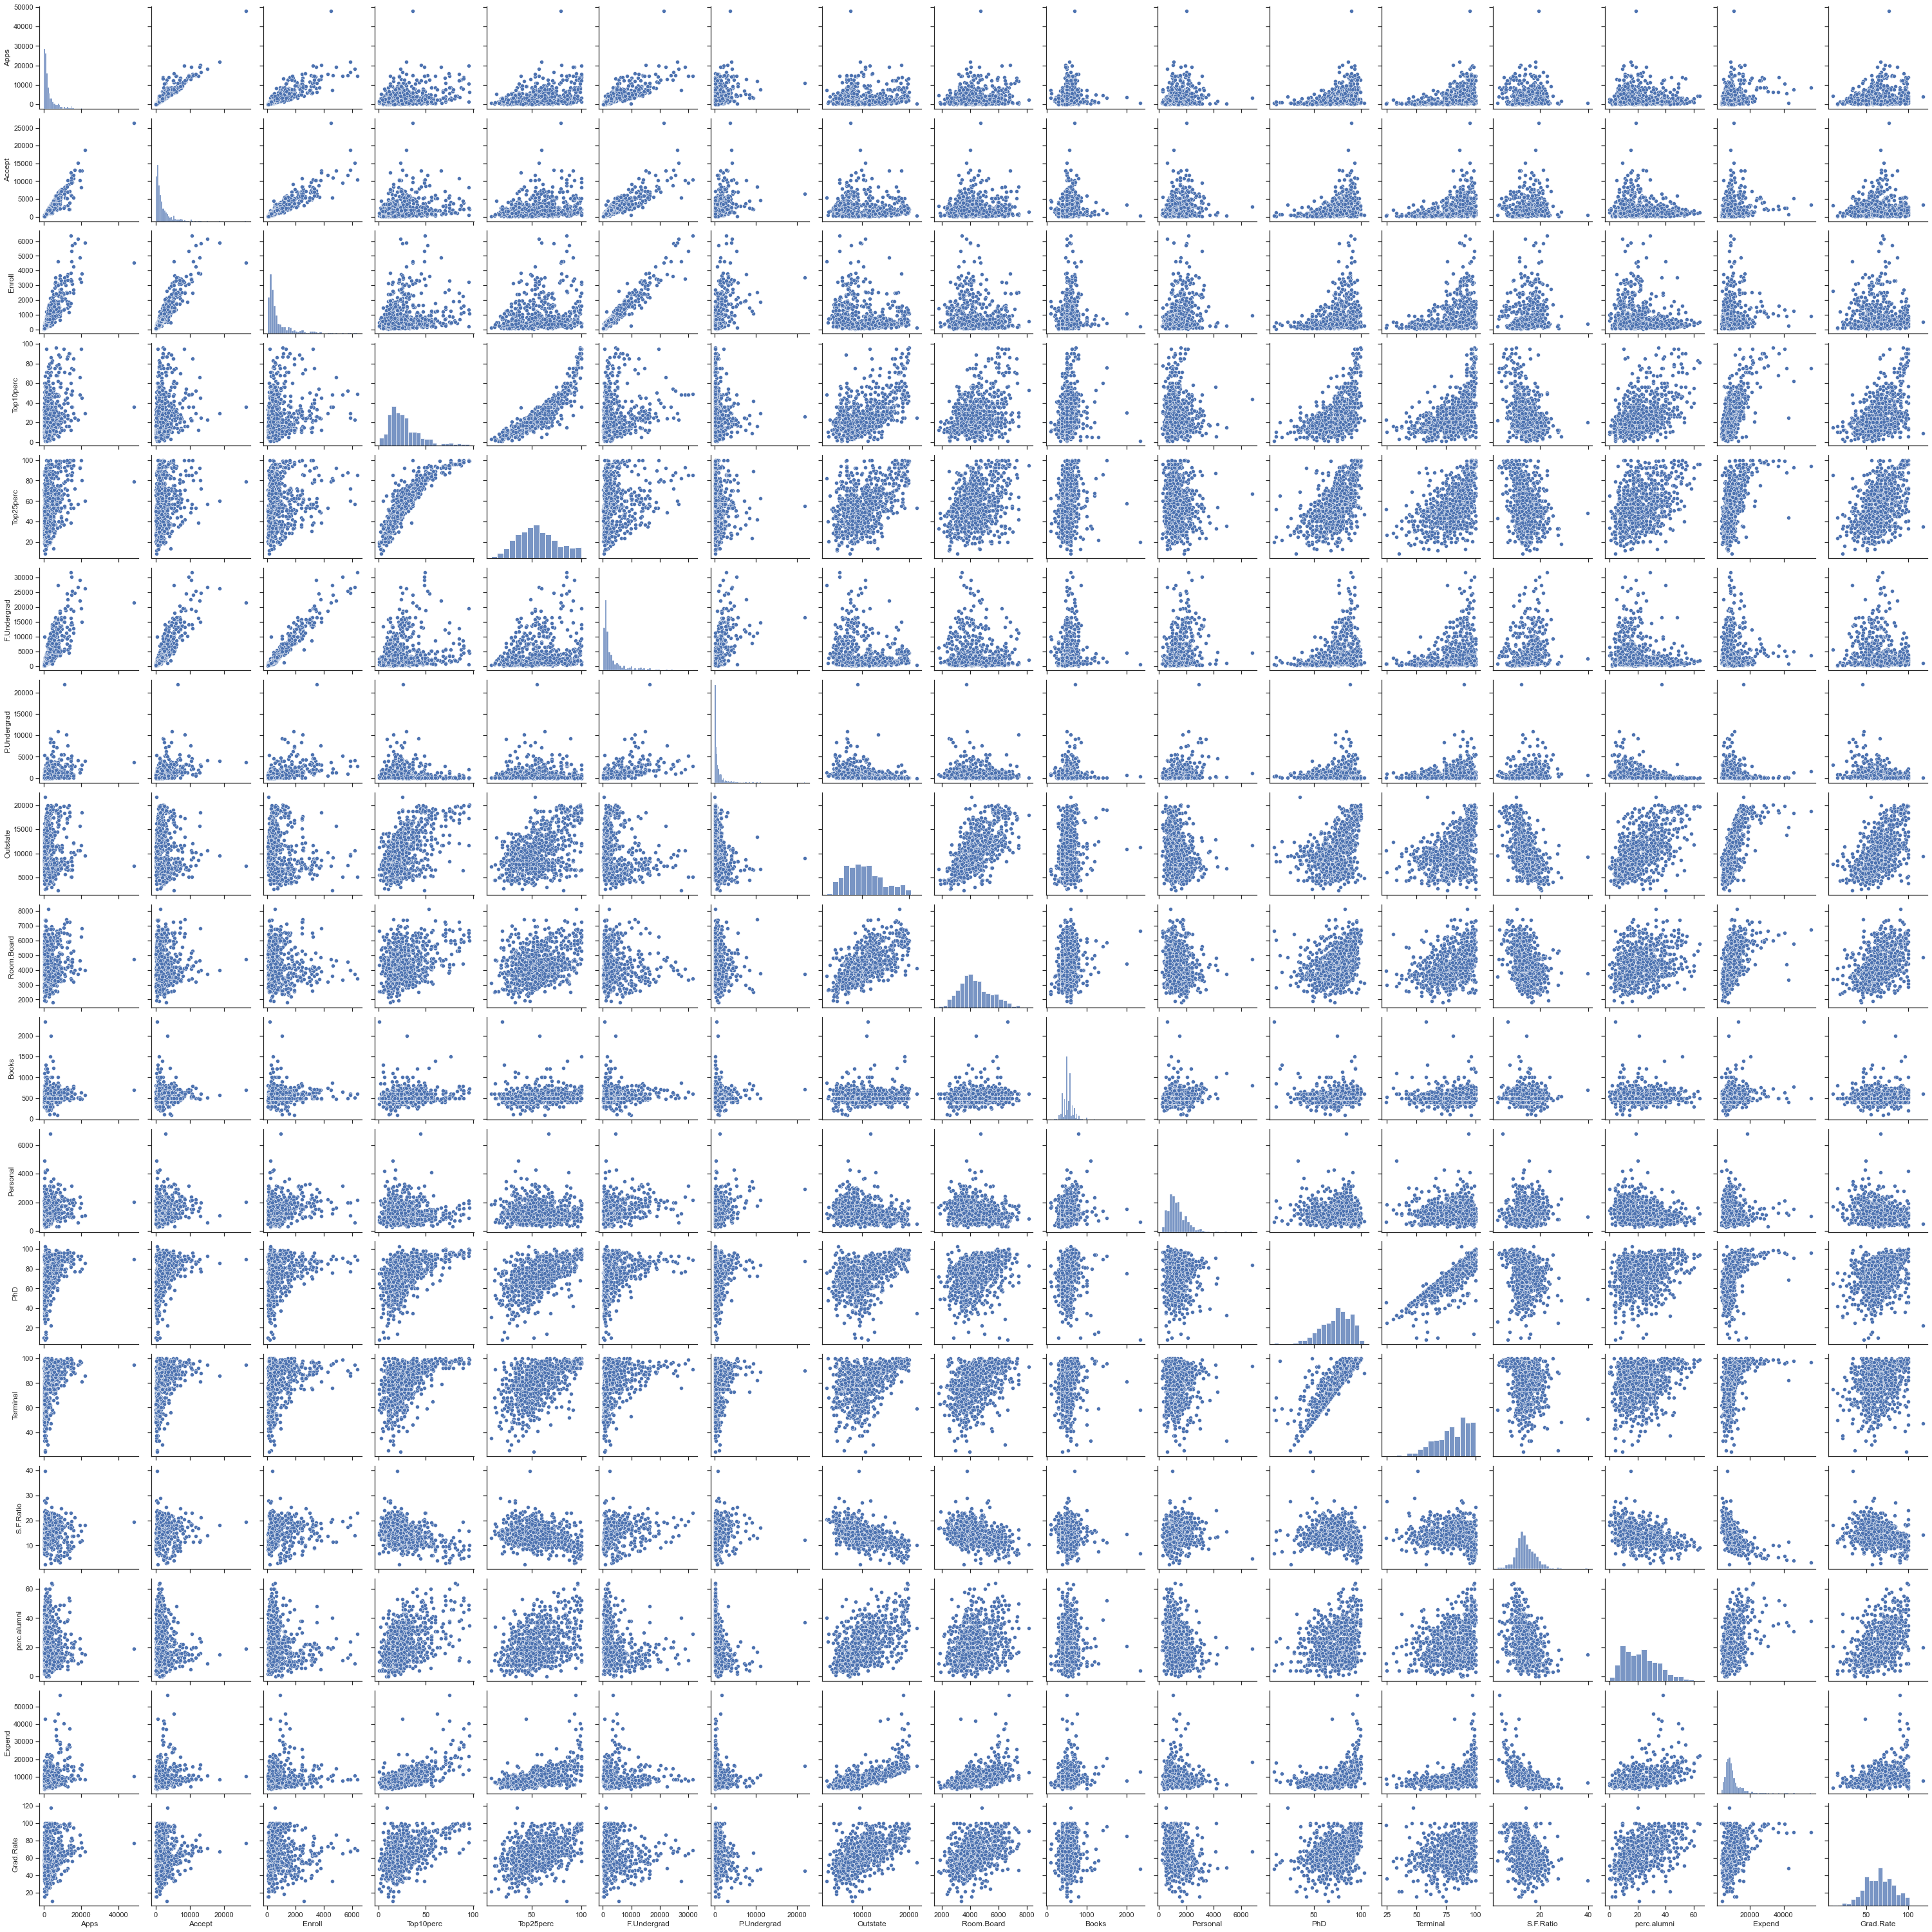

In [25]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(colleges)
plt.show()

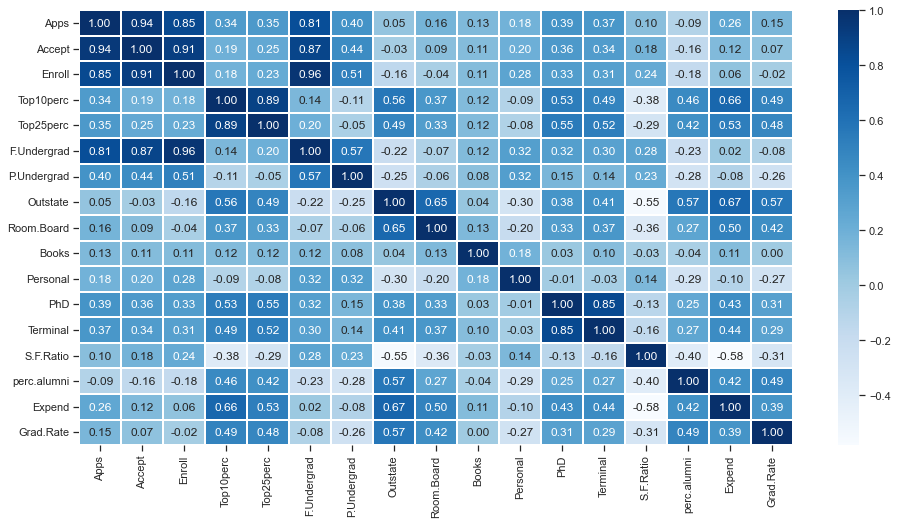

In [26]:
corr = colleges.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',cmap='Blues',ax=ax)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [28]:
colleges1 = colleges.copy()

In [29]:
colleges1['Apps'] = std_scale.fit_transform(colleges[['Apps']])
colleges1['Accept'] = std_scale.fit_transform(colleges[['Accept']])
colleges1['Enroll'] = std_scale.fit_transform(colleges[['Enroll']])
colleges1['Top10perc'] = std_scale.fit_transform(colleges[['Top10perc']])
colleges1['Top25perc'] = std_scale.fit_transform(colleges[['Top25perc']])
colleges1['F.Undergrad'] = std_scale.fit_transform(colleges[['F.Undergrad']])
colleges1['P.Undergrad'] = std_scale.fit_transform(colleges[['P.Undergrad']])
colleges1['Outstate'] = std_scale.fit_transform(colleges[['Outstate']])
colleges1['Room.Board'] = std_scale.fit_transform(colleges[['Room.Board']])
colleges1['Books'] = std_scale.fit_transform(colleges[['Books']])
colleges1['Personal'] = std_scale.fit_transform(colleges[['Personal']])
colleges1['PhD'] = std_scale.fit_transform(colleges[['PhD']])
colleges1['Terminal'] = std_scale.fit_transform(colleges[['Terminal']])
colleges1['S.F.Ratio'] = std_scale.fit_transform(colleges[['S.F.Ratio']])
colleges1['perc.alumni'] = std_scale.fit_transform(colleges[['perc.alumni']])
colleges1['Expend'] = std_scale.fit_transform(colleges[['Expend']])
colleges1['Grad.Rate'] = std_scale.fit_transform(colleges[['Grad.Rate']])

In [30]:
colleges1.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                            -0.346882           -0.210884       -0.406866   
Accept                          -0.321205           -0.038703       -0.376318   
Enroll                          -0.063509           -0.288584       -0.478121   
Top10perc                       -0.258583           -0.655656       -0.315307   
Top25perc                       -0.191827           -1.353911       -0.292878   
F.Undergrad                     -0.168116           -0.209788       -0.549565   
P.Undergrad                     -0.209207            0.244307        -0.49709   
Outstate                        -0.746356            0.457496        0.201305   
Room.Board                      -0.964905            1.909208       -0.554317   
Books                           -0.602312             1.21588       -0.905344   
Personal                         1.270045            0.235515       -0.259582   
PhD                             -0.163028           -2.675646       -1.204845   
Terminal                        -0.115729           -3.378176       -0.931341   
S.F.Ratio                        1.013776           -0.477704       -0.300749   
perc.alumni                     -0.867574           -0.544572        0.585935   
Expend                           -0.50191             0.16611        -0.17729   
Grad.Rate                       -0.318252           -0.551262       -0.667767   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                   -0.668261                  -0.726176  
Accept                 -0.681682                  -0.764555  
Enroll                 -0.692427                  -0.780735  
Top10perc               1.840231                  -0.655656  
Top25perc               1.677612                  -0.596031  
F.Undergrad            -0.658079                  -0.711924  
P.Undergrad            -0.520752                   0.009005  
Outstate                0.626633                  -0.716508  
Room.Board              0.996791                  -0.216723  
Books                  -0.602312                   1.518912  
Personal               -0.688173                   0.235515  
PhD                     1.185206                   0.204672  
Terminal                1.175657                  -0.523535  
S.F.Ratio              -1.615274                  -0.553542  
perc.alumni             1.151188                  -1.675079  
Expend                  1.792851                   0.241803  
Grad.Rate              -0.376504                  -2.939613

In [31]:
colleges1.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

In [32]:
colleges1.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

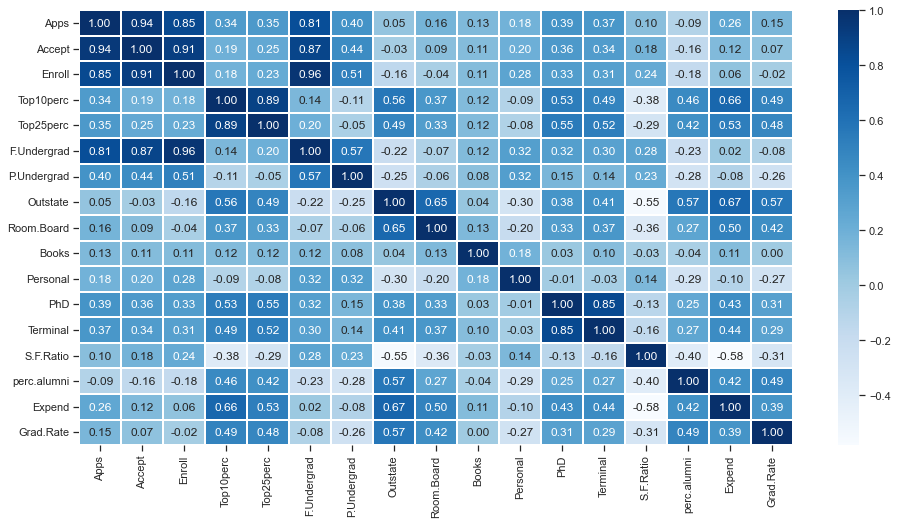

In [33]:
corr = colleges1.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',cmap='Blues',ax=ax)
plt.show()

In [34]:
colleges1.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

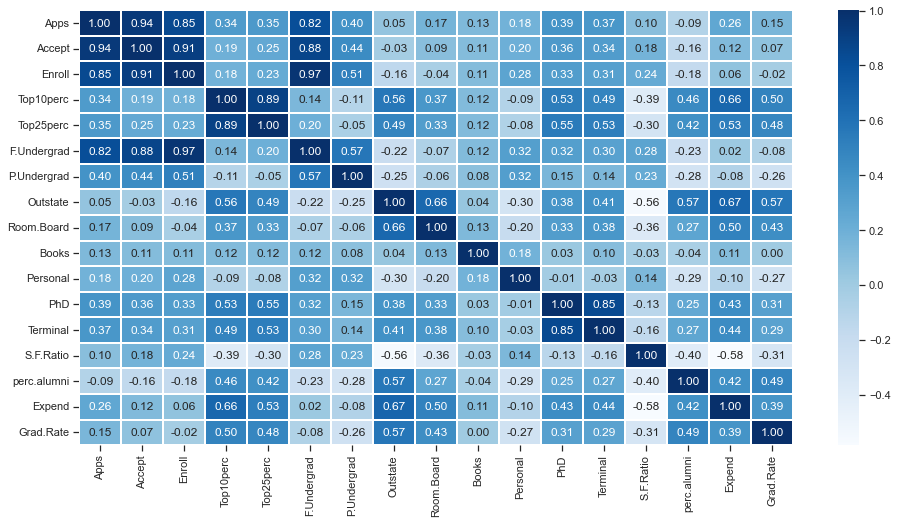

In [35]:
cov = colleges1.cov()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(cov, annot = True, linewidths=1.5 , fmt = '.2f',cmap='Blues',ax=ax)
plt.show()

College dataset checked for outliers before scaling. 

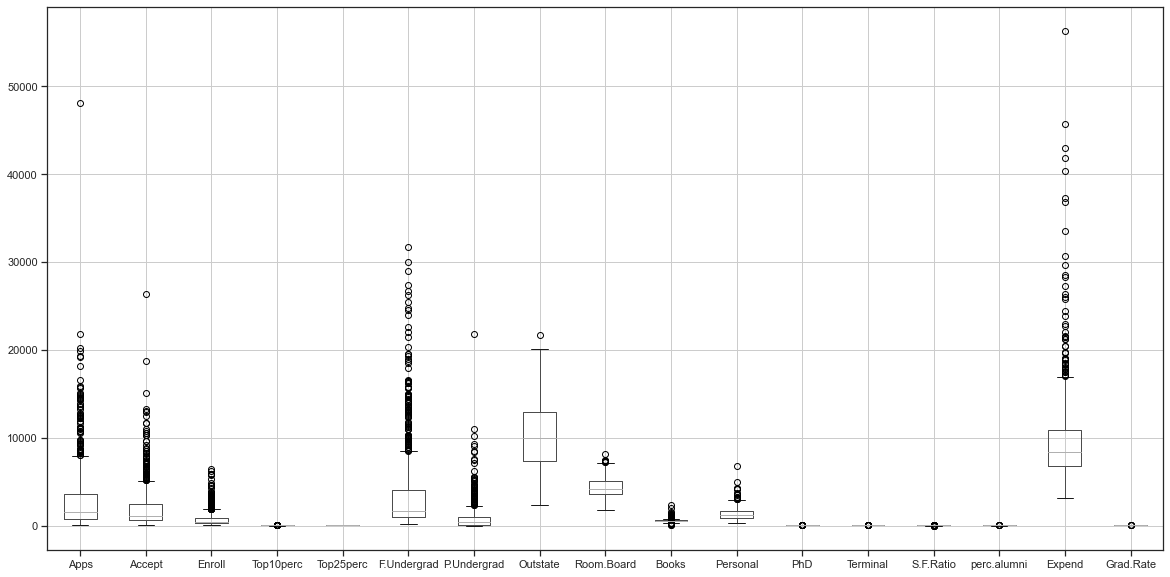

In [36]:
colleges.boxplot(figsize=(20,10));

colleges dataset checked after scaling. 

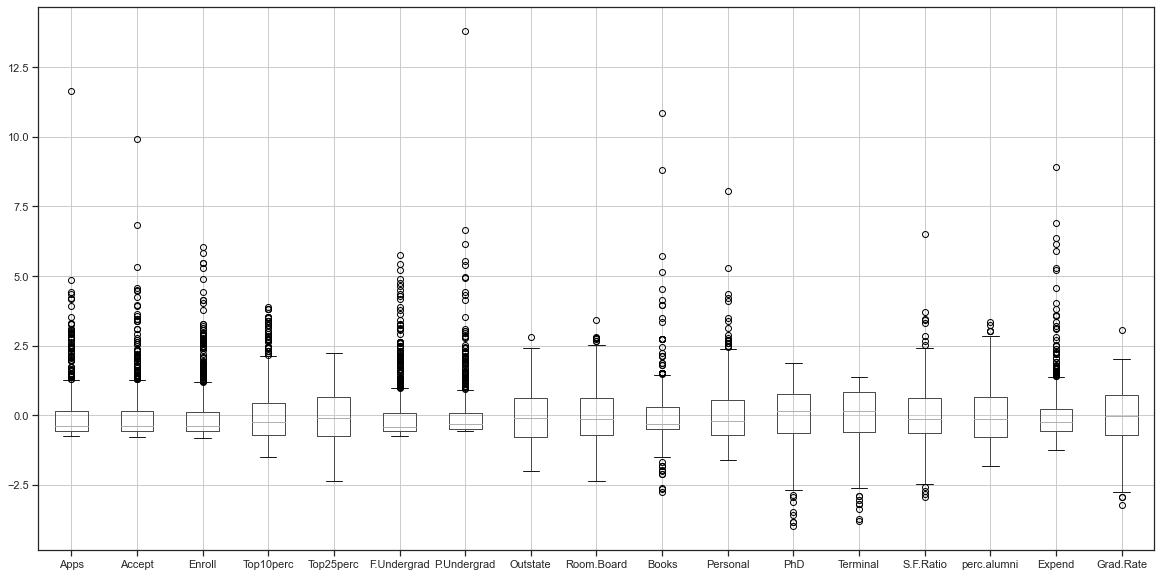

In [37]:
colleges1.boxplot(figsize=(20,10));

dropped the column "Names" before creating covariance and correlation matrix. 

In [38]:
colleges2= colleges1.drop(['Names'], axis=1)
colleges2

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3    1.175657  -1.615274     1.151188  1.792851  -0.376504  
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613  
..        ...        ...          ...       ...        ...  
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301  
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555  
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029  
775  1.107689  -2.095582     2.120194  5.887971   1.953595  
776 -0.319632   1.013776     0.424434 -0.987116   1.953595  

[777 rows x 17 columns]

In [39]:
cov_matrix = colleges2.cov()
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s                  Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391

In [40]:
corr_matrix = colleges2.corr()
print('Correlation Matrix \n%s', corr_matrix)

Correlation Matrix 
%s                  Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.39

In [41]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [42]:
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [43]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(colleges2)
p_value

0.0

In [44]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(colleges2)
kmo_model

0.8131251200373522

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(colleges2)
pca_transformed.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [46]:
#eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [47]:
#eigen values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [52]:
tot = sum(pca.explained_variance_)
tot

17.02190721649483

In [48]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

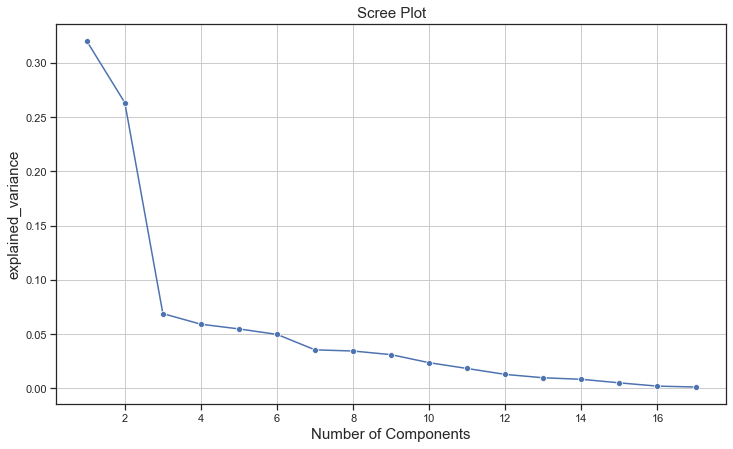

In [49]:
plt.figure(figsize=(12,7))
sns.lineplot(y=explained_variance,x=range(1,len(explained_variance)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('explained_variance',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [50]:
college_pca = pd.DataFrame(pca.components_,columns=list(colleges2))
college_pca.head(5)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])